In [8]:
import torch
import torch.nn as nn
import torchvision
from torchvision.transforms import ToTensor
from torchvision import datasets
import matplotlib.pyplot as plt


In [9]:
train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform= ToTensor(), target_transform=None)
test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())

In [10]:
image, label = train_data[0]

In [11]:
image.shape
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

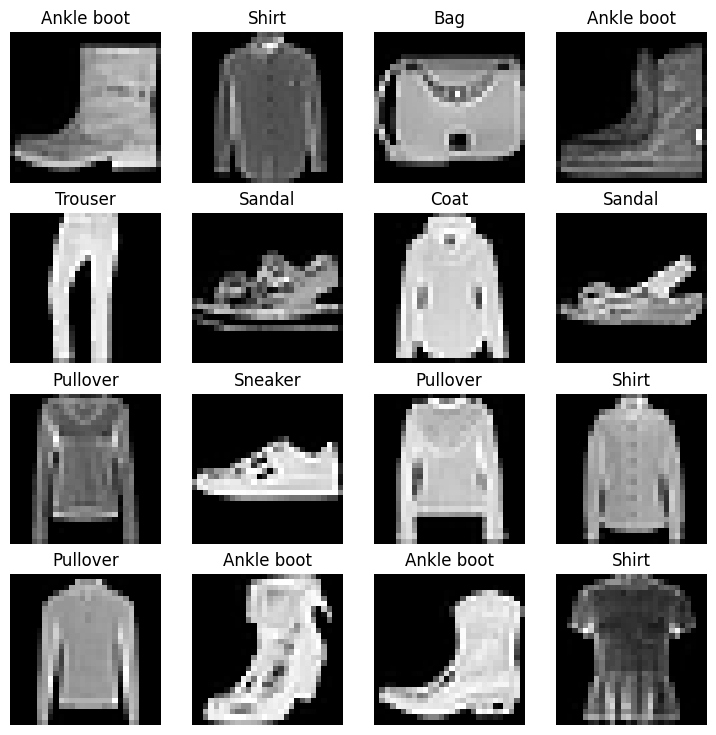

In [99]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [13]:
device = 'cpu'

In [14]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True)

test_dataloader = DataLoader(test_data, batch_size = BATCH_SIZE, shuffle = True)

In [15]:
class BaseModel(nn.Module):
    def __init__(self, input_shape : int, output_shape : int, hidden_units : int ):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape), 
        )
    def forward(self, x):
        return self.layer_stack(x)

In [16]:
torch.manual_seed(42)

model_0 = BaseModel(input_shape=784, output_shape=len(class_names), hidden_units=10)

model_0.to('cpu')

BaseModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [18]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.1)

In [19]:
from timeit import default_timer as timer

def print_train_time(
    start : float,
    end : float,
    device : torch.device = None):
    total_time = end - start
    print(f"TOTAL TIME TAKEN BY {device} is {total_time : .3f} seconds")
    return total_time


In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}\n----------")
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch%400 == 0:
            print(f"Looked at batch : {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    train_loss /= len(train_dataloader)
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for batch,  (X, y) in enumerate(test_dataloader):
            test_pred = model_0(X)
            loss = loss_fn(test_pred, y)
            test_loss += loss
            test_acc += accuracy_fn(y_true= y, y_pred= test_pred.argmax(dim = 1))
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    
    print(f"TRAIN LOSS : {train_loss} | TEST LOSS : {test_loss} | TEST ACCURACY : {test_acc}")

train_time_end_on_cpu = timer()

total_train_time_on_cpu = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model_0.parameters()).device))

C:\Users\Rizzam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
----------
Looked at batch : 0/60000 samples
Looked at batch : 12800/60000 samples
Looked at batch : 25600/60000 samples
Looked at batch : 38400/60000 samples
Looked at batch : 51200/60000 samples


 33%|███▎      | 1/3 [00:13<00:27, 13.92s/it]

TRAIN LOSS : 3.040599822998047 | TEST LOSS : 3.17954158782959 | TEST ACCURACY : 72.14456869009585
Epoch : 1
----------
Looked at batch : 0/60000 samples
Looked at batch : 12800/60000 samples
Looked at batch : 25600/60000 samples
Looked at batch : 38400/60000 samples
Looked at batch : 51200/60000 samples


 67%|██████▋   | 2/3 [00:27<00:13, 13.60s/it]

TRAIN LOSS : 3.611367702484131 | TEST LOSS : 4.68812370300293 | TEST ACCURACY : 68.79992012779553
Epoch : 2
----------
Looked at batch : 0/60000 samples
Looked at batch : 12800/60000 samples
Looked at batch : 25600/60000 samples
Looked at batch : 38400/60000 samples
Looked at batch : 51200/60000 samples


100%|██████████| 3/3 [00:41<00:00, 13.73s/it]

TRAIN LOSS : 3.31801176071167 | TEST LOSS : 1.4897810220718384 | TEST ACCURACY : 79.52276357827476
TOTAL TIME TAKEN BY cpu is  41.185 seconds


In [21]:
torch.manual_seed(42)

def eval_model(model : nn.Module, dataloader : DataLoader, loss_fn : nn.Module, accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_pred=y_pred.argmax(dim=1), y_true=y)
        loss /= len(dataloader)
        acc /= len(dataloader)

    return {"MODEL NAME" : model.__class__.__name__,
            "ACCURACY" : acc,
            "LOSS" : loss.item()}


model_0_results = eval_model(model=model_0, dataloader=test_dataloader, loss_fn= loss_fn, accuracy_fn=accuracy_fn)
model_0_results

{'MODEL NAME': 'BaseModel',
 'ACCURACY': 79.56269968051119,
 'LOSS': 1.4834405183792114}

In [22]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')
device

'cuda'

In [49]:
class Model_V2(nn.Module):
    def __init__(self, input_shape: int, hidden_units : int, output_shape : int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= input_shape, out_features= hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU(),
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [24]:
model_1 = Model_V2(input_shape=784, hidden_units=10, output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [25]:
optimizer = torch.optim.SGD(params=model_1.parameters(), lr= 0.1)

In [26]:
def TrainStep(model: nn.Module, data_loader: DataLoader, loss_fn: nn.Module, optimizer: torch.optim.Optimizer, accuracy_fn, device : torch.device = device):
    
    train_loss, train_acc = 0, 0
    model.to(device)
    model.train()
    for batch, (X,y) in enumerate(data_loader):
        X,y = X.to(device), y.to(device)
        train_pred = model(X)
        loss = loss_fn(train_pred, y)
        train_loss += loss.item()
        train_acc += accuracy_fn(y_pred= train_pred.argmax(dim =1), y_true=y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"TRAIN LOSS: {train_loss} | TRAIN ACCURACY: {train_acc}")
def TestStep(model: nn.Module, data_loader: DataLoader, loss_fn: nn.Module, optimizer: torch.optim.Optimizer, accuracy_fn, device : torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X,y = X.to(device), y.to(device)
            test_pred = model(X)
            loss = loss_fn(test_pred, y)
            test_loss += loss.item()
            test_acc += accuracy_fn(y_pred= test_pred.argmax(dim=1), y_true=y)
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"TEST LOSS: {test_loss} | TEST ACCURACY: {test_acc}")

In [70]:
torch.manual_seed(42)
train_time_start_on_model_1 = timer()
epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"EPOCH: {epoch}\n ---------")
    TrainStep(data_loader=train_dataloader, model=model_1, loss_fn=loss_fn, accuracy_fn=accuracy_fn, optimizer=torch.optim.SGD(params= model_1.parameters(), lr=0.01))
    TestStep(data_loader=test_dataloader, model=model_1, loss_fn=loss_fn, accuracy_fn=accuracy_fn, optimizer=torch.optim.SGD(params= model_1.parameters(), lr=0.01))
train_time_end_on_model_1 = timer()
total_train_time_on_model_1 = print_train_time(start=train_time_start_on_model_1, end=train_time_end_on_model_1, device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

EPOCH: 0
 ---------
TRAIN LOSS: 0.4745696357210477 | TRAIN ACCURACY: 83.70333333333333


 20%|██        | 1/5 [00:13<00:55, 13.76s/it]

TEST LOSS: 0.4877570831356719 | TEST ACCURACY: 83.15694888178913
EPOCH: 1
 ---------
TRAIN LOSS: 0.4573004300236702 | TRAIN ACCURACY: 84.19


 40%|████      | 2/5 [00:27<00:40, 13.50s/it]

TEST LOSS: 0.49626185047550325 | TEST ACCURACY: 82.95726837060703
EPOCH: 2
 ---------
TRAIN LOSS: 0.4448486922423045 | TRAIN ACCURACY: 84.675


 60%|██████    | 3/5 [00:40<00:27, 13.52s/it]

TEST LOSS: 0.4686633653629321 | TEST ACCURACY: 83.90575079872204
EPOCH: 3
 ---------
TRAIN LOSS: 0.4354440340558688 | TRAIN ACCURACY: 84.93666666666667


 80%|████████  | 4/5 [00:54<00:13, 13.58s/it]

TEST LOSS: 0.4611030504964411 | TEST ACCURACY: 83.95567092651757
EPOCH: 4
 ---------
TRAIN LOSS: 0.4278810818592707 | TRAIN ACCURACY: 85.17


100%|██████████| 5/5 [01:07<00:00, 13.57s/it]

TEST LOSS: 0.4551409160890899 | TEST ACCURACY: 84.16533546325878
TOTAL TIME TAKEN BY cuda is  67.838 seconds


In [63]:
class Model_V3(nn.Module):
    def __init__(self, input_shape : int, output_shape : int, hidden_units : int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)   
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )
    def forward(self, x : torch.Tensor):
        return self.classifier(self.block_2(self.block_1(x)))

In [64]:
torch.manual_seed(42)

model_2 = Model_V3(input_shape=1, output_shape=len(class_names), hidden_units=10).to(device)
model_2

Model_V3(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [65]:
images = torch.randn(size = (32, 3, 64, 64))
test_image = images[0]
print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Single image pixel values:
tensor([[[-0.0793,  1.6144, -0.4617,  ..., -0.3390,  0.1549, -0.2794],
         [-0.5967,  0.0242,  0.8264,  ...,  0.5394,  0.0590,  0.2875],
         [ 0.0881, -0.0106,  2.0317,  ...,  0.6341, -0.5408,  1.3265],
         ...,
         [ 0.5949,  1.0955,  0.7693,  ..., -0.5738,  0.9187,  0.7561],
         [ 0.4068,  0.9570,  0.2887,  ...,  0.1231,  0.7267,  0.3002],
         [ 1.9694,  0.9515,  1.3571,  ..., -0.7764, -0.4411, -0.2924]],

        [[-0.0115, -0.5974,  2.0710,  ..., -1.6814,  0.9977,  0.6090],
         [-1.2258,  1.6480, -1.4137,  ...,  0.7258,  0.8074, -0.7784],
         [ 1.4650, -0.3883, -0.5527,  ...,  0.5641,  0.2478, -0.1571],
         ...,
         [ 1.5853,  1.6764,  0.3468,  ...,  0.6637, -0.8358,  0.3972],
         [-1.4526,  0.4073,  0.3668,  ...,  0.8799,  0.6329, -0.3277],
         [ 0.6710, -2.3354, -0.2408,  ..., -0.3148, -0.6067, -1.9394]],

In [66]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [67]:
torch.manual_seed(42)

train_time_start_on_model_2 = timer()
epochs = 3


for epoch in range(epochs):
    print(f"EPOCH : {epoch}")
    TrainStep(data_loader=train_dataloader, model=model_2,loss_fn=loss_fn, optimizer=optimizer, device=device, accuracy_fn=accuracy_fn)
    TestStep(data_loader=train_dataloader, model=model_2,loss_fn=loss_fn, device=device, accuracy_fn=accuracy_fn, optimizer=optimizer)

train_time_end_on_model_2 = timer()
total_train_time_on_model_2 = print_train_time(start=train_time_start_on_model_2, end=train_time_end_on_model_2, device=device)

EPOCH : 0
TRAIN LOSS: 0.5960456770102183 | TRAIN ACCURACY: 78.41166666666666
TEST LOSS: 0.363844046274821 | TEST ACCURACY: 86.89833333333333
EPOCH : 1
TRAIN LOSS: 0.3559488690892855 | TRAIN ACCURACY: 87.23333333333333
TEST LOSS: 0.3526498467842738 | TEST ACCURACY: 87.89
EPOCH : 2
TRAIN LOSS: 0.32278271644115447 | TRAIN ACCURACY: 88.325
TEST LOSS: 0.28966445087989173 | TEST ACCURACY: 89.64166666666667
TOTAL TIME TAKEN BY cuda is  71.129 seconds


In [68]:
model_2_results = eval_model(model=model_2, dataloader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_2_results
model_1_results = eval_model(model=model_1, dataloader=test_dataloader, loss_fn= loss_fn, accuracy_fn=accuracy_fn)
model_1_results

{'MODEL NAME': 'Model_V2',
 'ACCURACY': 82.46805111821087,
 'LOSS': 0.5110650658607483}

In [71]:
import pandas as pd

compare_model_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_model_results['training_time'] = [total_train_time_on_cpu, total_train_time_on_model_1, total_train_time_on_model_2]
compare_model_results

,MODEL NAME,ACCURACY,LOSS,training_time
0,BaseModel,79.562700,1.483441,41.185379
1,Model_V2,82.468051,0.511065,67.838057
2,Model_V3,88.358626,0.322536,71.129121


Text(0, 0.5, 'model')

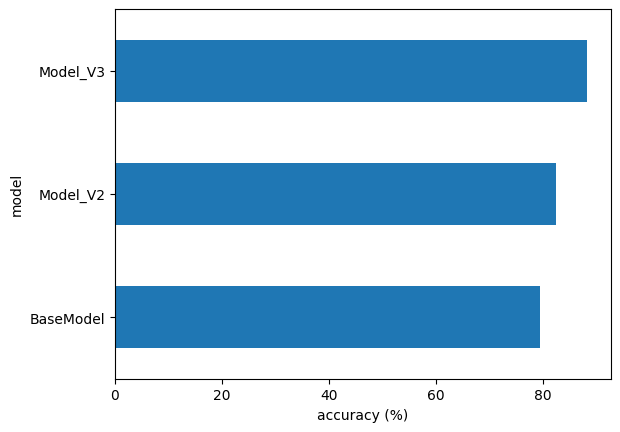

In [75]:
compare_model_results.set_index("MODEL NAME")["ACCURACY"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim = 0).to(device)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)
            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)

In [80]:
import random

random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k = 9):
    test_samples.append(sample)
    test_labels.append(label)
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [96]:
pred_probs = make_predictions(model=model_2, data=test_samples)
pred_probs[:2]

tensor([[1.1027e-07, 4.9409e-08, 6.6470e-08, 5.6026e-08, 2.6073e-09, 9.9913e-01,
         9.7733e-09, 1.7255e-05, 2.5073e-05, 8.3012e-04],
        [7.5500e-02, 6.9103e-01, 8.2280e-04, 1.0805e-01, 6.9594e-02, 1.1800e-04,
         5.4526e-02, 2.2561e-04, 2.6523e-05, 1.1061e-04]])

In [97]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes, test_labels

(tensor([5, 1, 7, 2, 3, 0, 4, 7, 1]), [5, 1, 7, 4, 3, 0, 4, 7, 1])

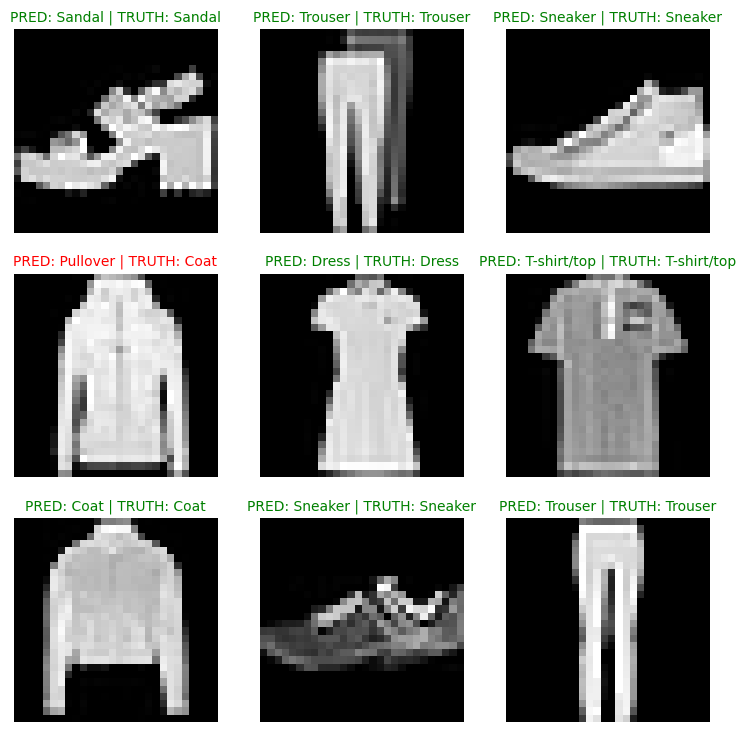

In [88]:
plt.figure(figsize=(9, 9))
nrows =3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap='gray')
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]
    title_text = f"PRED: {pred_label} | TRUTH: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, fontsize = 10, c = 'g')
    else:
        plt.title(title_text, fontsize = 10, c = 'r')
    plt.axis(False)

In [ ]:
from tqdm.auto import tqdm


y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc = 'MAKING PREDICTIONS'):
        X, y = X.to(device), y.to(device)
        y_logit = model_2(X)
        y_pred = torch.softmax(y_logit, dim = 1).argmax(dim = 1)
        y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)




MAKING PREDICTIONS: 100%|██████████| 313/313 [00:05<00:00, 52.96it/s]


In [90]:
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19

0.23.4


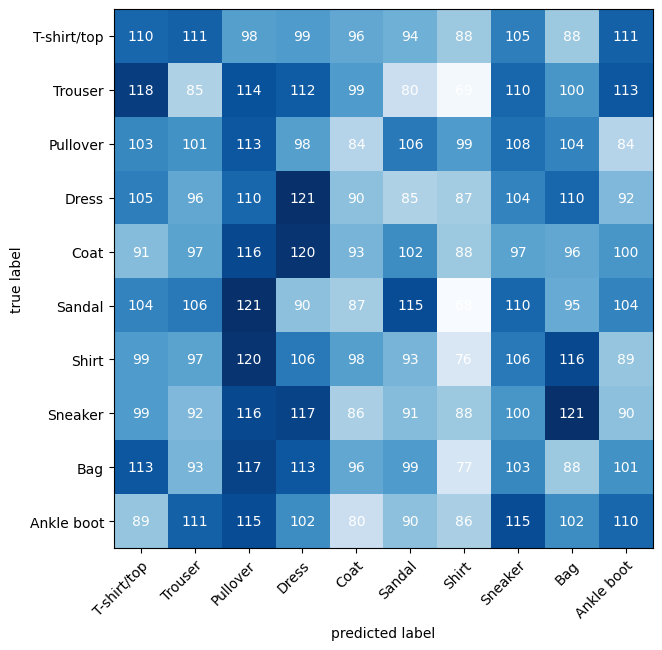

In [94]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix


confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds = y_pred_tensor, target = test_data.targets)

fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), class_names= class_names, figsize=(10,7))

In [98]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True, exist_ok = True)

MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f'SAVING MODEL TO: {MODEL_SAVE_PATH}')
torch.save(obj=model_2.state_dict(), f = MODEL_SAVE_PATH)

SAVING MODEL TO: models\03_pytorch_computer_vision_model_2.pth
